In [1]:
!pip install tensorflow
!pip install -q tf-nightly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.0/631.0 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.3 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import PIL
from PIL import Image
from urllib import request
from io import BytesIO


Data Analysis

In [5]:
from keras.datasets import cifar10
import numpy as np
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

print("Number of classes:", len(np.unique(y_train)))
print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])
print("Image shape:", X_train.shape[1:])

classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Split the dataset into 80% training and 20% testing
split_ratio = 0.8
split_idx = int(len(X_train) * split_ratio)
X_train, X_test = X_train[:split_idx], X_train[split_idx:]
y_train, y_test = y_train[:split_idx], y_train[split_idx:]

# Demo of the Splitting
print("Number of classes after splitting:", len(np.unique(y_train)))
print("Number of training samples after splitting:", X_train.shape[0])
print("Number of testing samples after splitting:", X_test.shape[0])
print("Image shape after splitting:", X_train.shape[1:])


Number of classes: 10
Number of training samples: 50000
Number of testing samples: 10000
Image shape: (32, 32, 3)
Number of classes after splitting: 10
Number of training samples after splitting: 40000
Number of testing samples after splitting: 10000
Image shape after splitting: (32, 32, 3)


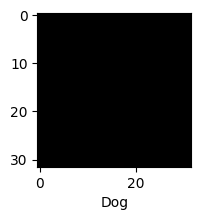

In [7]:
import matplotlib.pyplot as plt
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])
  plt.show()
# Demo of the Function
plot_sample(X_train,y_train,56)

CNN(Convolutional Neural Network)



In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import PIL
from PIL import Image
from urllib import request
from io import BytesIO
num_classes = 10
weight_decay = 1e-4

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(weight_decay)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(weight_decay)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(weight_decay)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Training the model with data augmentation

In [12]:
# Data augmentation
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

batch_size = 32
epochs = 3
history = model.fit(
    data_augmentation.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs
)

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 113ms/step - accuracy: 0.1004 - loss: 2.3036
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 112ms/step - accuracy: 0.0967 - loss: 2.3045
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 111ms/step - accuracy: 0.1019 - loss: 2.3034


Testing the accuracy of the model

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.1038 - loss: 2.3027
Test Accuracy: 0.10140000283718109


Plotting graph for the training acuracy and training loss



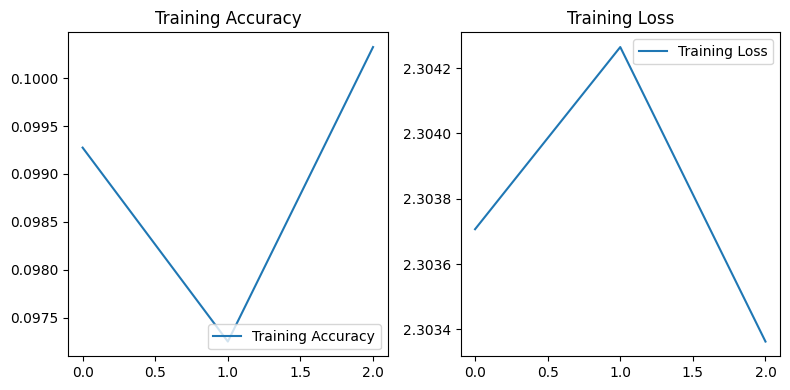

In [14]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

plt.tight_layout()
plt.show()


Testing the model

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
classification_rep = classification_report(y_test, y_pred_classes, target_names=classes)
print(classification_rep)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step
              precision    recall  f1-score   support

    Airplane       0.00      0.00      0.00      1014
  Automobile       0.10      1.00      0.18      1014
        Bird       0.00      0.00      0.00       952
         Cat       0.00      0.00      0.00      1016
        Deer       0.00      0.00      0.00       997
         Dog       0.00      0.00      0.00      1025
        Frog       0.00      0.00      0.00       980
       Horse       0.00      0.00      0.00       977
        Ship       0.00      0.00      0.00      1003
       Truck       0.00      0.00      0.00      1022

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM MODEL

In [ ]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train_flatten, y_train)

best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Testing the SVM model
svm_test_accuracy = best_svm_model.score(X_test_flatten, y_test)
print("SVM Test Accuracy:", svm_test_accuracy)

3D Visualization of Augmented CIFAR-10 Data

In [ ]:
#just in case we don't run svm model
X_train_flatten = X_train.reshape(X_train.shape[0], -1)

pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(X_train_flatten)

fig = px.scatter_3d(x=x_train_pca[:, 0], y=x_train_pca[:, 1], z=x_train_pca[:, 2], color=y_train.flatten(),
                    labels={'color': 'Class'}, title='3D Visualization of Augmented CIFAR-10 Data')
fig.show()

Comparing the original and augumented image

In [ ]:
index = 56

original_image = X_train[index]
augmented_image = data_augmentation.random_transform(original_image)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
random_url = "https://www.lamborghini.com/sites/it-en/files/DAM/lamborghini/facelift_2019/homepage/families-gallery/2023/revuelto/revuelto_m.png"

res = request.urlopen(random_url).read()
Sample_Image = Image.open(BytesIO(res)).resize((50,25))

plt.imshow(Sample_Image)

random_path = tf.keras.utils.get_file('dbcjdc',origin = random_url)

img = keras.preprocessing.image.load_img(
    random_path, target_size=(32, 32)
)
img_array = keras.preprocessing.image.img_to_array (img)
img_array = tf.expand_dims (img_array, 0) # Create a batch

predictions = model.predict (img_array)
score = tf.nn.softmax(predictions [0])

print(
  "This image most likely belongs to {} with a {:.2f} percent confidence."
  .format (classes [np.argmax(score)], 100 * np.max(score))
)